# Gradient Descent

In [20]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt 

In [21]:
x_train = np.array([1.0, 2.0])  # our training data
y_train = np.array([300.0, 500])  # the output labels/target values.

print(f"x_train={x_train}")
print(f"y_train={y_train}")

x_train=[1. 2.]
y_train=[300. 500.]


The cost function is as follows:

$$
J(w, b) = \frac{1}{2m}\sum_{i=1}^{m}\left(f_{w,b}(x^i) - y^i\right)^2
$$

In [22]:
def compute_cost(x: NDArray[np.float64], y: NDArray[np.float64], w: float, b: float) -> float:
    """
    Computes the cost function for linear regression.

    The cost function measures the difference between predicted values and actual values
    using the mean squared error (MSE) formula.

    Args:
        x (NDArray[np.float64]): Input feature values (independent variable).
        y (NDArray[np.float64]): Target values (dependent variable).
        w (float): Weight (slope) of the linear model.
        b (float): Bias (intercept) of the linear model.

    Returns:
        float: The computed cost value.
    """
    
    m = len(x)
    return sum(((x[i] * w + b) - y[i]) ** 2 for i in range(m))/(2*m)

We can use vectorization to improve our implementation:

In [23]:
def compute_cost(
    x: NDArray[np.float64], y: NDArray[np.float64], w: float, b: float
) -> float:
    """
    Computes the cost function for linear regression.

    The cost function measures the difference between predicted values and actual values
    using the mean squared error (MSE) formula.

    Args:
        x (NDArray[np.float64]): Input feature values (independent variable).
        y (NDArray[np.float64]): Target values (dependent variable).
        w (float): Weight (slope) of the linear model.
        b (float): Bias (intercept) of the linear model.

    Returns:
        float: The computed cost value.
    """

    errors = (w * x + b - y) ** 2
    return float(np.mean(errors)) / 2

The Gradient Descent algorithm is as follows:


$$
\text{Repeat until convergence:}
\left\{ 

\begin{align*}
w := w - \alpha\frac{\partial{J}}{\partial{w}} \\ 
b := b - \alpha\frac{\partial{J}}{\partial{b}}
\end{align*}


\right\}	

$$

The partial derivatives are as follows:

$$
\frac{\partial{J}}{\partial{w}} = \frac{1}{m}\sum_{i=1}^{m}\left(f_{w,b}(x^i) - y^i\right)(x^i) = \frac{1}{m}\sum_{i=1}^{m}\left(wx^i+b - y^i\right)(x^i)
$$ 

$$
\frac{\partial{J}}{\partial{w}} = \frac{1}{m}\sum_{i=1}^{m}\left(f_{w,b}(x^i) - y^i\right) = \frac{1}{m}\sum_{i=1}^{m}\left(wx^i+b - y^i\right)
$$

In [28]:
from typing import NamedTuple, Callable


class GradientDescentOutput(NamedTuple):
    """Represents the output of the gradient descent algorithm.

    Attributes:
        w (float): The final weight of the model.
        b (float): The final bias of the model.
        cost_history (list[float]): History of the cost (loss) at each iteration.
        param_history (list[tuple[float, float]]): History of (w, b) parameter
            values at each iteration.
    """

    w: float
    b: float
    cost_history: list[float]
    param_history: list[tuple[float, float]]


def perform_gradient_descent(
    x: NDArray[np.float64],
    y: NDArray[np.float64],
    *,
    initial_w: float = 0,
    initial_b: float = 0,
    alpha: float = 0.01,
    iterations: int = 10_000,
) -> GradientDescentOutput:
    """
    Performs gradient descent optimization on a linear model of the form y = w * x + b.

    Args:
        x (np.ndarray): Independent variable data of shape (m,).
        y (np.ndarray): Dependent variable data (labels) of shape (m,).
        initial_w (float, optional): The initial weight parameter for the model.
            Defaults to 0.0.
        initial_b (float, optional): The initial bias parameter for the model.
            Defaults to 0.0.
        alpha (float, optional): The learning rate for gradient descent.
            Defaults to 0.01.
        iterations (int, optional): The number of gradient descent iterations.
            Defaults to 10_000.

    Returns:
        GradientDescentOutput: A named tuple containing:
            - w (float): The final weight value.
            - b (float): The final bias value.
            - cost_history (list[float]): The cost at each iteration (MSE / 2).
            - param_history (list[tuple[float, float]]): The (w, b) values at each iteration.
    """

    m = x.shape[0]
    w = initial_w
    b = initial_b
    cost_history: list[float] = []
    param_history: list[tuple[float, float]] = []

    # Calcuates the
    d_dw: Callable[[float, float], float] = (
        lambda w, b: sum((w * float(x[i]) + b - y[i]) * x[i] for i in range(m)) / m
    )

    d_db: Callable[[float, float], float] = (
        lambda w, b: sum((w * float(x[i]) + b - y[i]) for i in range(m)) / m
    )

    for i in range(iterations):
        dw = d_dw(w, b)
        db = d_db(w, b)

        w = w - alpha * dw
        b = b - alpha * db
        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)
        param_history.append((w, b))

        if i % (iterations / 10) == 0:
            print(f"Iteration={i}, {w=}, {b=}, {cost=}")

    return GradientDescentOutput(
        w=w, b=b, cost_history=cost_history, param_history=param_history
    )

We can improve this implementation using vectorization and numpy operations:

In [30]:
def perform_gradient_descent(
    x: NDArray[np.float64],
    y: NDArray[np.float64],
    *,
    initial_w: float = 0,
    initial_b: float = 0,
    alpha: float = 0.01,
    iterations: int = 10_000,
) -> GradientDescentOutput:
    """
    Performs gradient descent optimization on a linear model of the form y = w * x + b.

    Args:
        x (np.ndarray): Independent variable data of shape (m,).
        y (np.ndarray): Dependent variable data (labels) of shape (m,).
        initial_w (float, optional): The initial weight parameter for the model.
            Defaults to 0.0.
        initial_b (float, optional): The initial bias parameter for the model.
            Defaults to 0.0.
        alpha (float, optional): The learning rate for gradient descent.
            Defaults to 0.01.
        iterations (int, optional): The number of gradient descent iterations.
            Defaults to 10_000.

    Returns:
        GradientDescentOutput: A named tuple containing:
            - w (float): The final weight value.
            - b (float): The final bias value.
            - cost_history (list[float]): The cost at each iteration (MSE / 2).
            - param_history (list[tuple[float, float]]): The (w, b) values at each iteration.
    """

    w, b = initial_w, initial_b
    cost_history: list[float] = []
    param_history: list[tuple[float, float]] = []

    for _ in range(iterations):

        errors = w * x + b - y

        d_dw = np.mean(errors * x)
        d_db = np.mean(errors)

        w -= alpha * float(d_dw)
        b -= alpha * float(d_db)

        cost = compute_cost(x, y, w, b)

        cost_history.append(cost)
        param_history.append((w, b))

    return GradientDescentOutput(w, b, cost_history, param_history)

In [32]:
output = perform_gradient_descent(x_train, y_train)
print(f"Final w: {output.w}, Final b: {output.b}")

Final w: 199.99285075131766, Final b: 100.011567727362


Now let's plot our cost and parameter history.

We will use different plots of start (first 100 iterations) and end (final 9000 iterations) because the rate of change is very different among them.

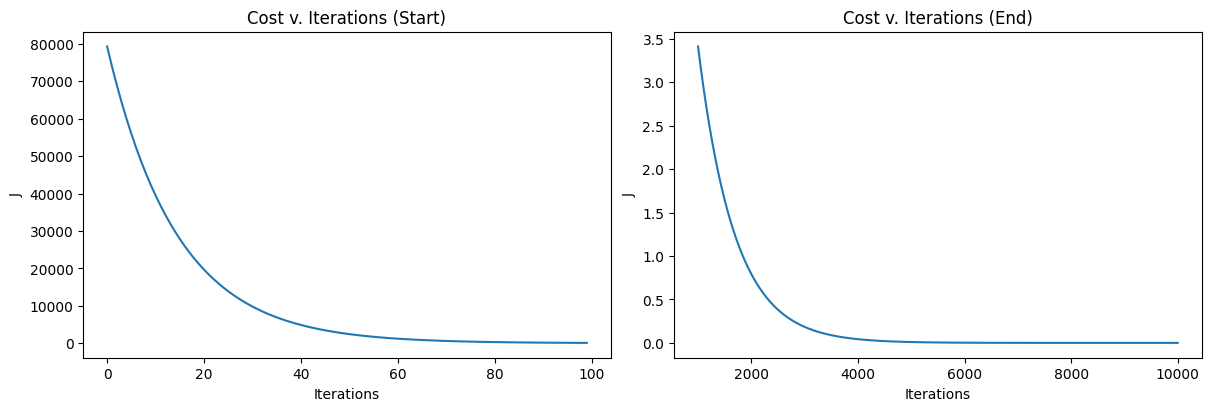

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))

ax1.set_title("Cost v. Iterations (Start)")
ax2.set_title("Cost v. Iterations (End)")

ax1.set_xlabel("Iterations")
ax2.set_xlabel("Iterations")

ax1.set_ylabel("J")
ax2.set_ylabel("J")

ax1.plot(output.cost_history[:100])
ax2.plot(1000 + np.arange(len(output.cost_history[1000:])), output.cost_history[1000:])